# Cardivascular Disease Prediction

The aim of this project to predict the occurence of cardiovascular disease in patients based on their medical records. The project analyzes the patients medical records and medical history to calculate the probability of the occurence of cardiovascular disease in the patient. 

### Data Dictionary

| Feature | Description |
| --- | --- |
| General Health |  general health condition|
| Checkup| Last checkup |
| Excersise | Does the patient excersise |
|Heart Disease | Does the patient have heart disease |
|Skin Cancer | Does the patient have skin cancer |
| Other Cancer | Does the patient have other cancer |
| Depression | Does the patient have depression |
| Diabetes | Does the patient have diabetes |
|Arthritis | Does the patient have arthritis |
|Sex| patient's gender|
|Age-Category| patient's age category|
|BMI| patient's BMI|
|Smoking History| patient's smoking history|
|Alcohol Consumption| patient's alcohol consumption|
|Fruit Consumption| patient's fruit consumption|
|Green Vegetable Consumption| patient's green vegetable consumption|
|Fried Potato Consumption| patient's fried potato consumption|

In [367]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshwardhanfartale/cardiovascular-disease-risk-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Chethan Vakiti\.cache\kagglehub\datasets\harshwardhanfartale\cardiovascular-disease-risk-prediction-dataset\versions\1


In [11]:
import os

In [12]:
os.listdir(r"C:\Users\Chethan Vakiti\.cache\kagglehub\datasets\harshwardhanfartale\cardiovascular-disease-risk-prediction-dataset\versions\1")

['CVD_cleaned.csv']

In [443]:
df = pd.read_csv(r"C:\Users\Chethan Vakiti\.cache\kagglehub\datasets\harshwardhanfartale\cardiovascular-disease-risk-prediction-dataset\versions\1\CVD_cleaned.csv")

In [444]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [447]:
df.shape

(308854, 19)

# Data Preprocessing

In [450]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [451]:
# checking for null/missing values
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

In [453]:
# checking data types
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

#### The dataset has columns - weight, Height and BMI. However, the BMI column is calculated using the weight and height columns. Hence, the weight and height columns are dropped from the dataset.

In [457]:
df.drop(["Height_(cm)","Weight_(kg)"],axis=1,inplace=True)

In [459]:
#unique values in each column
for i in df.columns:
    print(i ,df[i].unique())

General_Health ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
Checkup ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
Exercise ['No' 'Yes']
Heart_Disease ['No' 'Yes']
Skin_Cancer ['No' 'Yes']
Other_Cancer ['No' 'Yes']
Depression ['No' 'Yes']
Diabetes ['No' 'Yes' 'No, pre-diabetes or borderline diabetes'
 'Yes, but female told only during pregnancy']
Arthritis ['Yes' 'No']
Sex ['Female' 'Male']
Age_Category ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
BMI [14.54 28.29 33.47 ... 63.83 19.09 56.32]
Smoking_History ['Yes' 'No']
Alcohol_Consumption [ 0.  4.  3.  8. 30.  2. 12.  1.  5. 10. 20. 17. 16.  6. 25. 28. 15.  7.
  9. 24. 11. 29. 27. 14. 21. 23. 18. 26. 22. 13. 19.]
Fruit_Consumption [ 30.  12.   8.  16.   2.   1.  60.   0.   7.   5.   3.   6.  90.  28.
  20.   4.  80.  24.  15.  10.  25.  14. 120.  32.  40.  17.  45. 100.
   9.  99.  96.  35.  50.  56.  48.  27.  7

#### The diabetes column has four values - Yes, No, No pre-diabetes or borderline diabetes and Yes, but female told only during pregnancy. So replacing the last two values with pre-diabetes and gestational diabetes, respectively.

In [462]:
df["Diabetes"] = df["Diabetes"].map({'No, pre-diabetes or borderline diabetes':'Pre-Diabetes', 'Yes, but female told only during pregnancy':'Gestational Diabities', 'Yes' : 'Yes', 'No' : 'No'})

## Outlier removal

In [465]:
# columns for outlier removal
cols = ['BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

#IQR for the selected columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

#Threshold for outlier removal
threshold = 1.5

This code uses a standard statistical method called the **Interquartile Range (IQR) method** to identify and remove outliers from your dataset.


  * **`Q1`**: This calculates the **first quartile** (or the 25th percentile) for each of the columns in your `cols` list. This value represents the point below which 25% of the data falls.
  * **`Q3`**: This calculates the **third quartile** (or the 75th percentile) for each column. This value represents the point below which 75% of the data falls.
  * **`IQR`**: This calculates the **Interquartile Range**, which is the difference between `Q3` and `Q1`. The IQR represents the middle 50% of your data and is a robust measure of spread that is not affected by outliers.

  * **`Threshold`**: This sets a constant value of `1.5`. In the IQR method, this is a standard multiplier used to define the boundaries for what is considered an outlier.

In [468]:
# Find index of outliers
index = np.where((df[cols] < (Q1 - threshold * IQR)) | (df[cols] > (Q3 + threshold * IQR)))[0]

This is the core logic. It defines the lower and upper bounds for each column and finds the data points that fall outside these bounds.

  * **Lower Bound**: `Q1 - 1.5 * IQR`. Any data point below this value is considered an outlier.
  * **Upper Bound**: `Q3 + 1.5 * IQR`. Any data point above this value is considered an outlier.
  * The `|` symbol is a logical "OR" operator. It checks if a data point is either below the lower bound OR above the upper bound.
  * `np.where()` returns the indices (row numbers) of all the data points that satisfy this condition. The `[0]` at the end is to extract just the row indices.

In [471]:
#Drop outliers
df = df.drop(df.index[index])

This final line takes the list of indices of the identified outlier rows and removes them from the DataFrame. The result is a new DataFrame (`df`) with the outliers removed, creating a cleaner dataset for your machine learning model.

## Descriptive Statistics

In [475]:
df.describe()

,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,186777.000000,186777.000000,186777.000000,186777.000000,186777.000000
mean,28.303577,2.505287,18.446104,11.893440,4.899565
std,5.433758,3.777076,10.898445,9.604871,4.261893
min,12.870000,0.000000,0.000000,0.000000,0.000000
25%,24.370000,0.000000,8.000000,4.000000,2.000000
50%,27.550000,0.000000,16.000000,8.000000,4.000000
75%,31.750000,4.000000,30.000000,16.000000,8.000000
max,43.280000,15.000000,56.000000,44.000000,17.000000


In [477]:
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,24.37,Yes,0.0,8.0,4.0,0.0


## Exploratory Data Analysis
In the exploratory data analysis,I will be looking at the data and try to understand the data. I will be analyzing the data to find the relationship between the features and the target variable. I will begin with looking at the distribution of data across all the variables. Then I will look at the relationship between the features and the target variable.

### Patient demographics

C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_11576\87414769.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution')

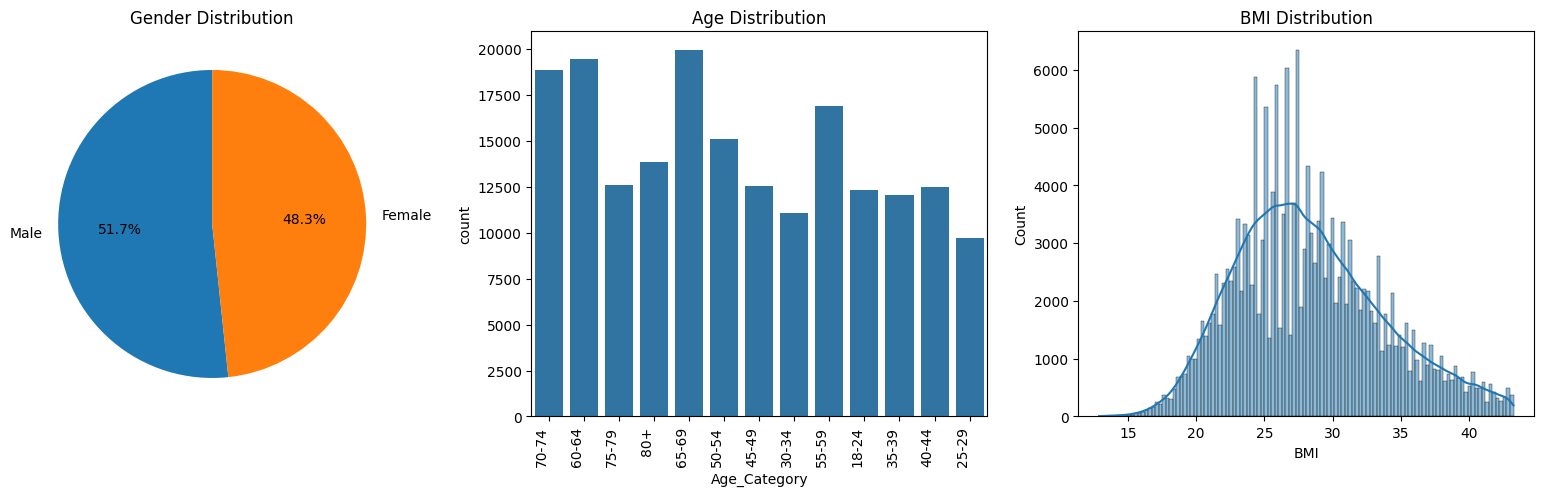

In [64]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
ax[0].pie(df['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.1f%%', startangle=90)
ax[0].set_title('Gender Distribution')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1]).set_title('Age Distribution')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True).set_title('BMI Distribution')

### **Overall Patient Demographics**

The three plots provide a clear overview of the demographic composition of the dataset. The data appears to represent a health study population with a fairly balanced gender distribution, a focus on older age groups, and a BMI distribution that is generally within a healthy to overweight range, but with a significant number of individuals classified as obese.

---

### **1. Gender Distribution (Pie Chart)**

* **Description:** The pie chart titled "Gender Distribution" shows the proportion of male and female patients in the dataset.
* **Analysis:** The data is almost evenly split between the two genders. The chart indicates that **51.9% of the patients are male** and **48.1% are female**. This is a well-balanced distribution, which is ideal for a machine learning model as it means the model won't be biased towards a specific gender due to a significant imbalance in the number of samples.

### **2. Age Distribution (Bar Chart)**

* **Description:** The bar chart titled "Age Distribution" shows the number of patients in different age categories.
* **Analysis:** The distribution of patients across age groups is not uniform. The chart clearly shows that the highest concentration of patients is in the older age categories. The age groups of **60-64, 65-69, and 70-74 have the largest number of patients**, with counts exceeding 25,000 for each. The patient count decreases significantly in the younger age groups, especially for those below 40. This suggests that the dataset is focused on a population where the risk of heart disease is typically higher, which is relevant to your project.

### **3. BMI Distribution (Histogram)**

* **Description:** The histogram titled "BMI Distribution" visualizes the frequency of different Body Mass Index (BMI) values in the dataset. A Kernel Density Estimate (KDE) curve is overlaid on the histogram to show a smoothed version of the distribution.
* **Analysis:** The BMI distribution appears to be **positively skewed (skewed to the right)**.
    * The **peak of the distribution is centered around a BMI of 25-30**, which falls in the "overweight" category for BMI classifications.
    * While most of the data is concentrated in the 20-40 BMI range, there is a **long tail of individuals with very high BMIs**, some exceeding 80. This indicates the presence of individuals who are severely obese and are likely at a very high risk of cardiovascular disease.

---

### General Health and Last Checkup

Text(0.5, 1.0, 'General Health and Last Checkup')

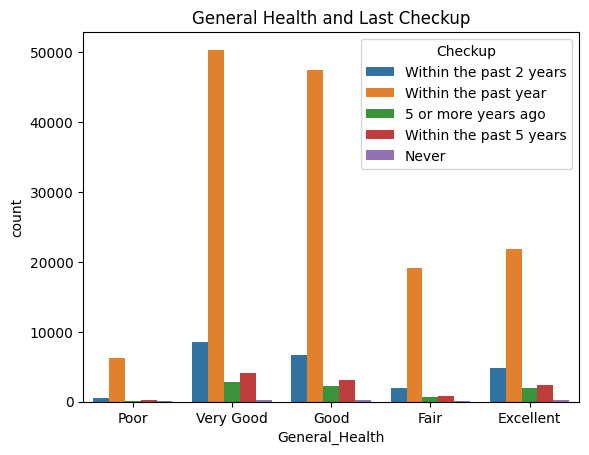

In [67]:
sns.countplot(x='General_Health',data=df,hue='Checkup').set_title('General Health and Last Checkup')

### **Analysis of "General Health and Last Checkup" Plot**

This grouped bar chart effectively visualizes the co-occurrence of two important categorical features: `General_Health` (on the x-axis) and `Checkup` (represented by different colors).

#### **Key Observations:**

**1. Dominance of Recent Checkups:**
Across almost all `General_Health` categories, the most frequent group is "Within the past year" (represented by the orange bars). This suggests that a large portion of the dataset's population has had a recent medical checkup, which is a positive indicator of health awareness in the study group.

**2. Strong Relationship between Health and Checkup Frequency:**
There is a clear and insightful relationship shown in the data:
* The **"Excellent"** and **"Very Good"** health groups have the highest proportion of patients who had a checkup "Within the past year" (the tallest orange bars).
* Conversely, the **"Poor"** health group has a relatively small orange bar, indicating a lower frequency of recent checkups. The proportion of people in this group who had a checkup "5 or more years ago" or **"Never"** is noticeably higher compared to the healthier groups.

**3. Inverse Correlation:**
The plot demonstrates an inverse correlation between the quality of self-reported general health and the recency of a checkup. People who perceive their health as "Poor" or "Fair" are less likely to have had a recent checkup and are more likely to have gone a long time without one. This could be due to a variety of factors, such as socioeconomic status, access to healthcare, or a lack of proactive health management.

### Exersise and General Health

Text(0.5, 1.0, 'Excersise and General Health')

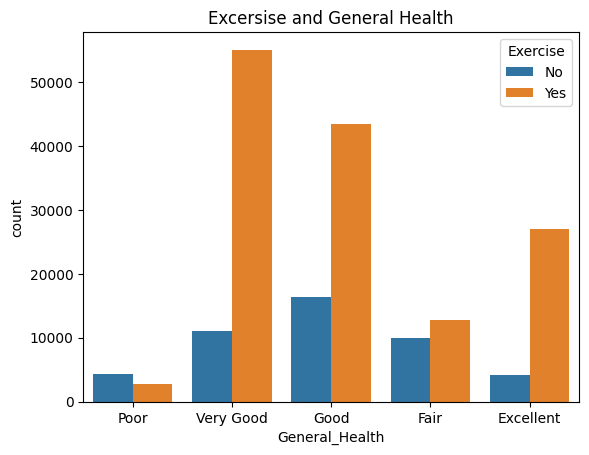

In [70]:
sns.countplot(x='General_Health', data=df, hue='Exercise').set_title('Excersise and General Health')

### **Analysis of "Exercise and General Health" Plot**

This grouped bar chart effectively visualizes the strong relationship between two categorical features: `General_Health` (on the x-axis) and `Exercise` (represented by different colors).

#### **Key Observations:**

**1. Overwhelming Majority of Exercisers:**
The most prominent finding in this plot is that for **every single `General_Health` category**, the number of people who report exercising (`Yes`, in orange) is substantially greater than the number of people who do not (`No`, in blue). This indicates that the vast majority of the population in this dataset engages in regular physical activity.

**2. Strong Correlation with Health Perception:**
The plot shows a clear and powerful correlation:
* In the healthier categories, such as **"Excellent"** and **"Very Good,"** the proportion of exercisers (`Yes`) is overwhelmingly high compared to non-exercisers (`No`). The orange bars are several times taller than the blue bars.
* While the orange bars are still taller in the **"Fair"** and **"Poor"** health categories, the proportion of non-exercisers is visibly larger than in the healthier groups. For instance, the "No" bar for "Poor" health is proportionally much closer in height to the "Yes" bar than it is for the "Excellent" health category.


### Food Consumption

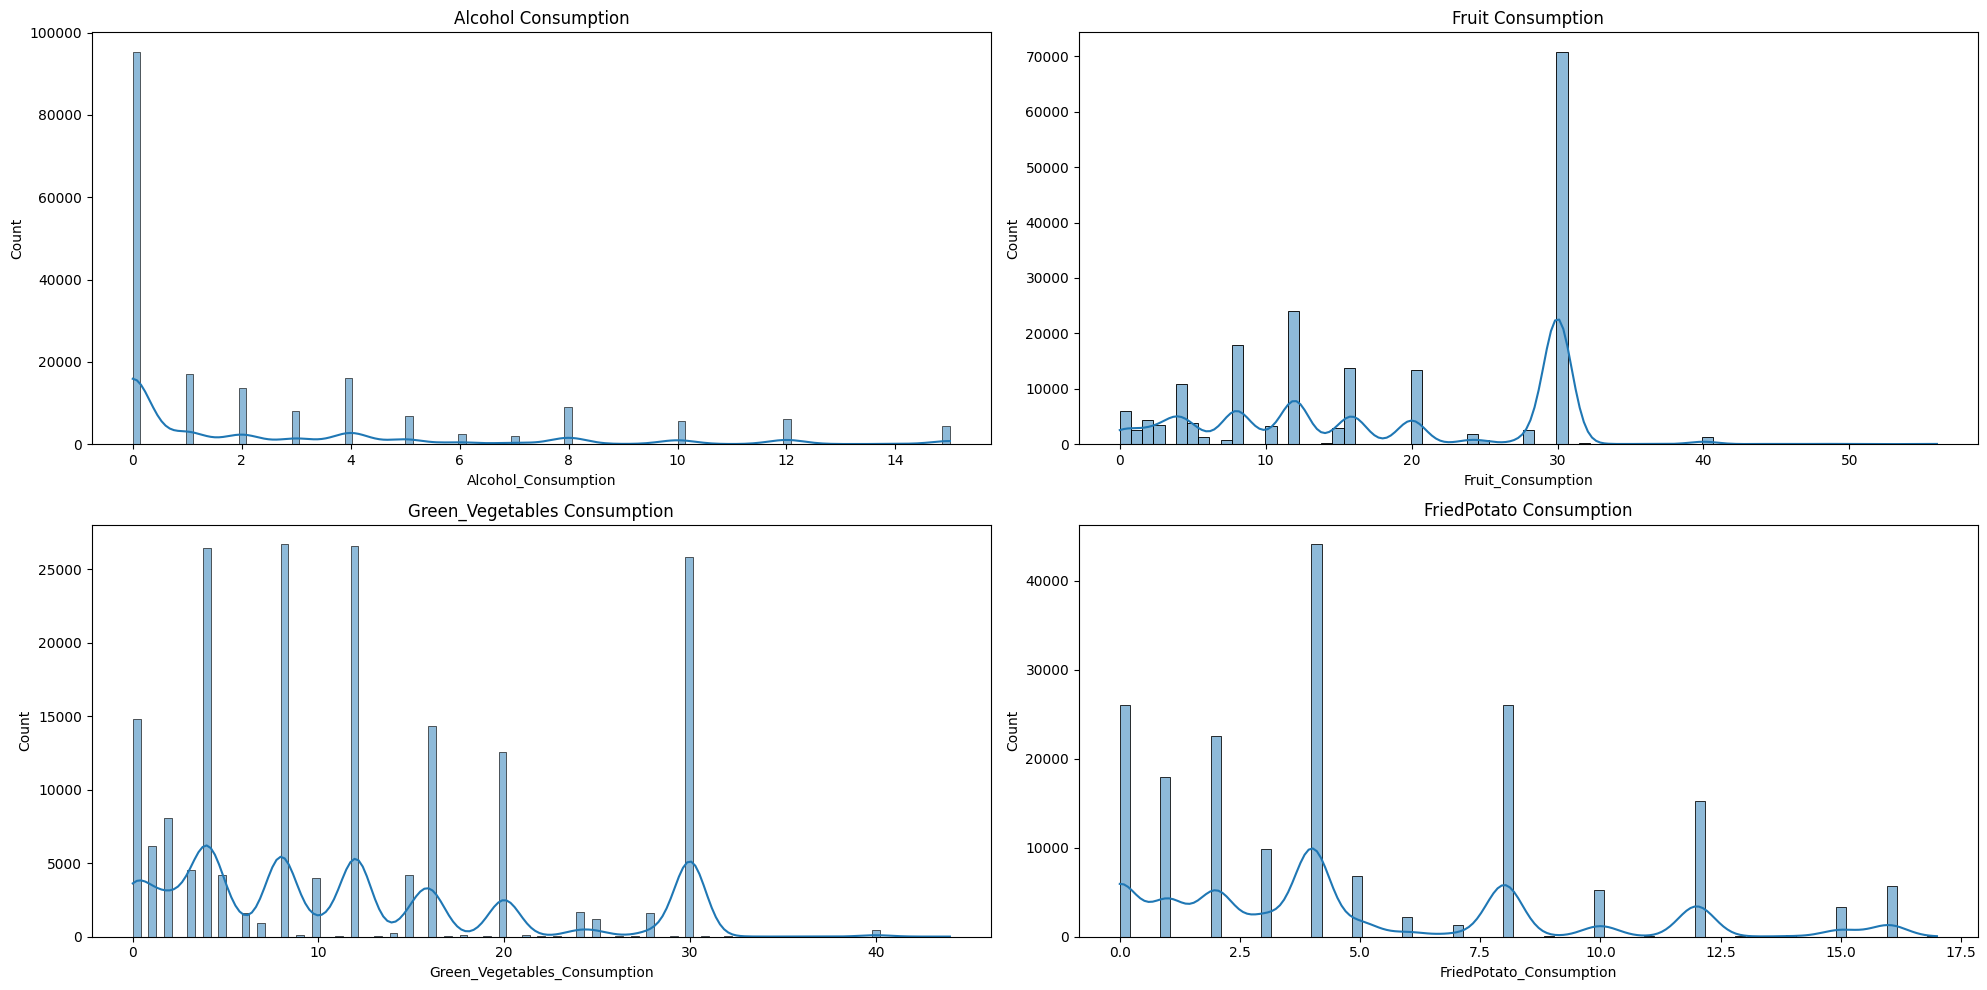

In [73]:
umptfig, ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(x = 'Alcohol_Consumption', data = df, ax = ax[0,0], kde = True).set_title('Alcohol Consumption')
sns.histplot(x = 'Fruit_Consumption', data = df, ax = ax[0,1], kde = True).set_title('Fruit Consumption')
sns.histplot(x = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0], kde = True).set_title('Green_Vegetables Consumption')
sns.histplot(x = 'FriedPotato_Consumption', data = df, ax = ax[1,1], kde = True).set_title('FriedPotato Consumption')
plt.tight_layout()


### **Analysis of Food Consumption Plots**

This grid of four histograms provides crucial insights into the dietary habits of the study population. The distributions vary significantly between the four variables, suggesting different reporting behaviors and consumption levels.

#### **1. Alcohol Consumption**

* **Description:** This histogram shows the distribution of alcohol consumption values.
* **Analysis:** The plot is **extremely skewed to the left**, with an overwhelmingly large spike at or near a value of 0. This indicates that the vast majority of individuals in this dataset consume very little to no alcohol. The distribution has a very long tail, but the number of people with high alcohol consumption is very low.

#### **2. Fruit Consumption**

* **Description:** This histogram shows the distribution of fruit consumption values.
* **Analysis:** Unlike alcohol, this plot has a series of **distinct, sharp peaks**, especially in the lower ranges (e.g., near 0, 10, 20, etc.). This suggests that fruit consumption was likely reported in discrete units (e.g., "number of servings per week" or "per month"). The distribution is still concentrated at the lower end, but there is a wide spread of consumption levels, with a few individuals reporting very high fruit intake.

#### **3. Green Vegetables Consumption**

* **Description:** This histogram shows the distribution of green vegetable consumption.
* **Analysis:** The pattern here is very similar to the fruit consumption plot, with **multiple, well-defined peaks**. This strongly suggests that green vegetable consumption was also reported in a discrete or interval-based manner. The highest frequency of reporting is at the lower end of the scale, indicating that, on average, people do not consume a very high number of green vegetable servings.

#### **4. Fried Potato Consumption**

* **Description:** This histogram shows the distribution of fried potato consumption.
* **Analysis:** This plot is **heavily skewed to the left**, almost identically to the alcohol consumption plot. It has a massive spike at the zero mark. This indicates that a huge proportion of the study population consumes very few or no fried potatoes. There is a long tail, but high consumption is rare.


### Medical History

Text(0.5, 1.0, 'Arthritis')

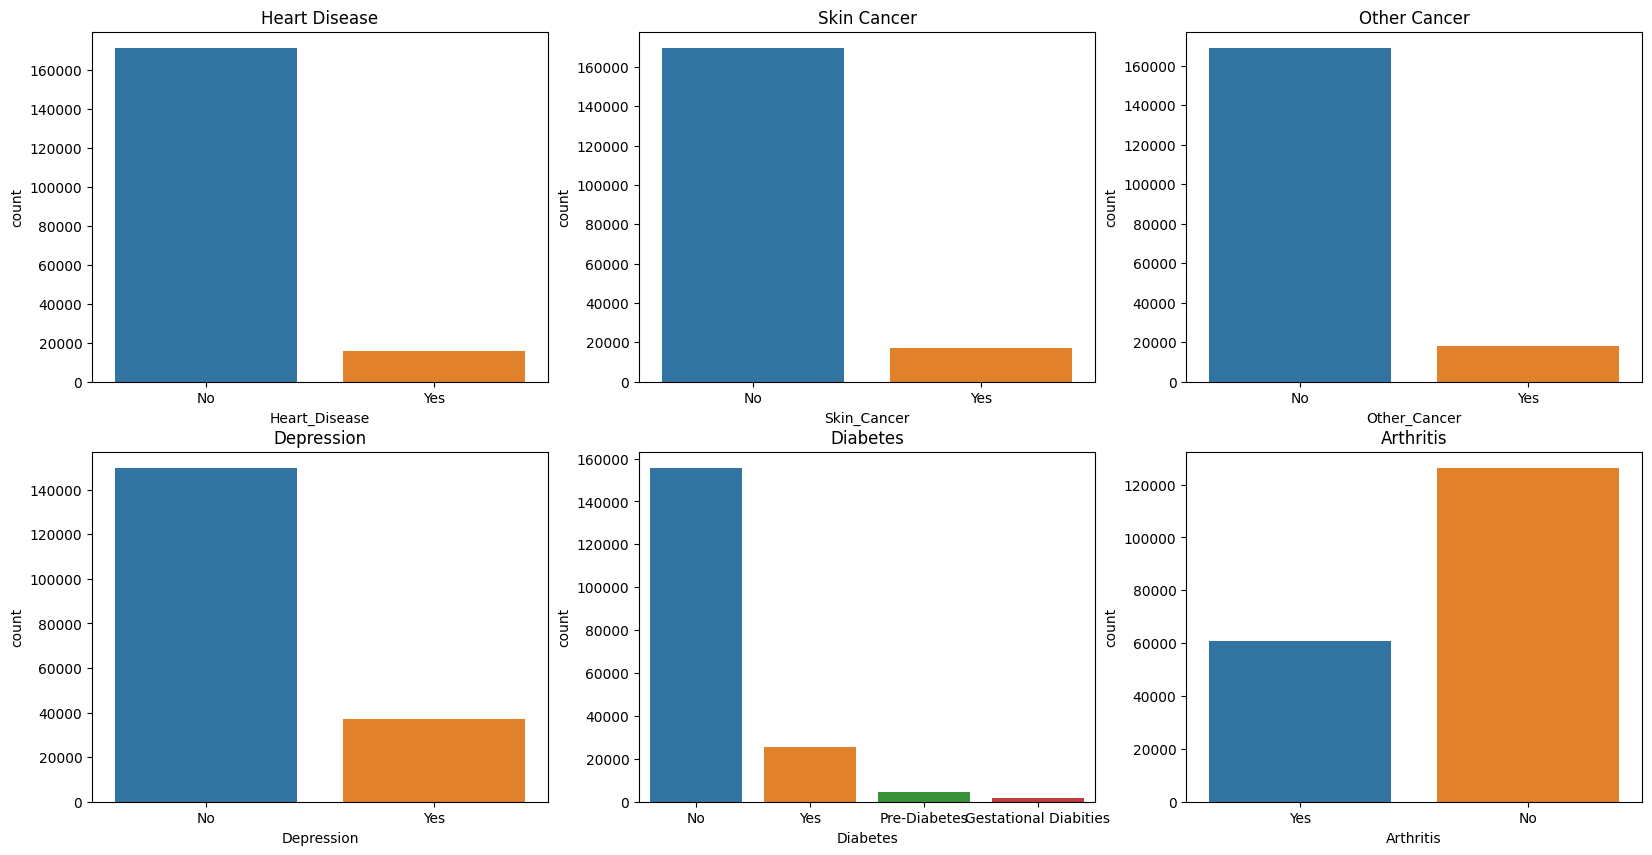

In [77]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Heart_Disease', data=df, hue='Heart_Disease', ax=ax[0,0]).set_title('Heart Disease')
sns.countplot(x = 'Skin_Cancer', data = df, hue = 'Skin_Cancer', ax = ax[0,1]).set_title('Skin Cancer')
sns.countplot(x = 'Other_Cancer',data = df, hue = 'Other_Cancer', ax = ax[0,2]).set_title('Other Cancer')
sns.countplot(x = 'Depression', data = df,  hue = 'Depression', ax = ax[1,0]).set_title('Depression')
sns.countplot(x = 'Diabetes', data = df, hue = 'Diabetes',  ax = ax[1,1]).set_title('Diabetes')
sns.countplot(x = 'Arthritis', data = df, hue = 'Arthritis',  ax = ax[1,2]).set_title('Arthritis')

### 2\. Analysis and Description of the Plots

The grid of six count plots provides a clear and valuable overview of the prevalence of various medical conditions and comorbidities in your dataset.

#### **Overall Observations:**

For almost all conditions, the plots show a **significant class imbalance**. The number of patients who do **not** have the condition (`No`) is substantially larger than the number of patients who do have it (`Yes`).

  * **Heart Disease (Target Variable):** The first plot confirms that your target variable is imbalanced. A large majority of the population does not have heart disease. This is a critical insight for your project, as it means you will need to pay close attention to metrics like **Precision, Recall, and the F1-Score** when evaluating your model, rather than just accuracy.
  * **Skin Cancer, Other Cancer, and Depression:** These three plots show a similar, very high degree of imbalance. The number of patients without these conditions is overwhelmingly high, indicating that these conditions are not very common in this dataset.
  * **Diabetes:** This plot, reflecting your previous data cleaning, shows the distribution across the four categories. The "No" bar is by far the tallest, but the `pre-diabetes` and `gestational diabetes` bars are also visible. The number of patients with full-blown diabetes ("Yes") is relatively small.
  * **Arthritis:** This plot is unique. While it is still imbalanced, the "Yes" bar is much larger and more significant than for any of the other conditions. This suggests that **arthritis is a more common comorbidity** in this patient population, and it may be a more important predictive feature than the other conditions you've plotted.


### Patients Smoking history

Text(0.5, 1.0, 'Smoking history')

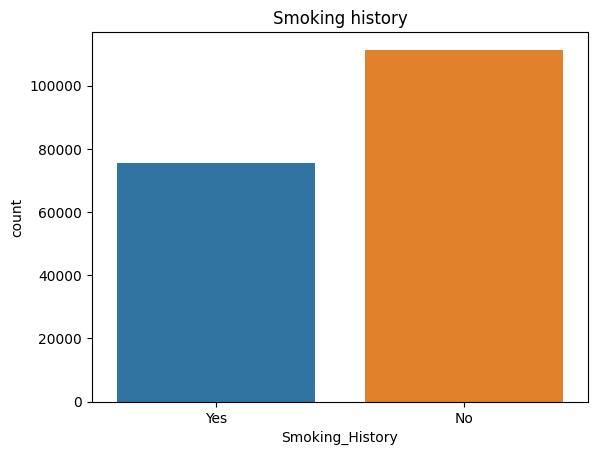

In [81]:
sns.countplot(x = 'Smoking_History', data=df, hue= 'Smoking_History').set_title('Smoking history')

### **Analysis of "Smoking history" Plot**

This count plot provides a clear and straightforward look at the smoking habits of the patient population.

#### **Key Observations:**

* The plot shows the distribution of the `Smoking_History` variable, which has two categories: `Yes` (indicating a history of smoking) and `No` (no history).
* The **`No` bar is taller** than the `Yes` bar, indicating that there are more non-smokers than smokers in this dataset.
* Based on a visual estimation, the count for non-smokers (`No`) is approximately 180,000, while the count for smokers (`Yes`) is around 125,000.


### Target Variable and Independent Variables Visualization

#### Patient's Demographics and Heart Disease

C:\Users\Chethan Vakiti\AppData\Local\Temp\ipykernel_11576\1378494049.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')


Text(0.5, 1.0, 'BMI Distribution and Heart Disease')

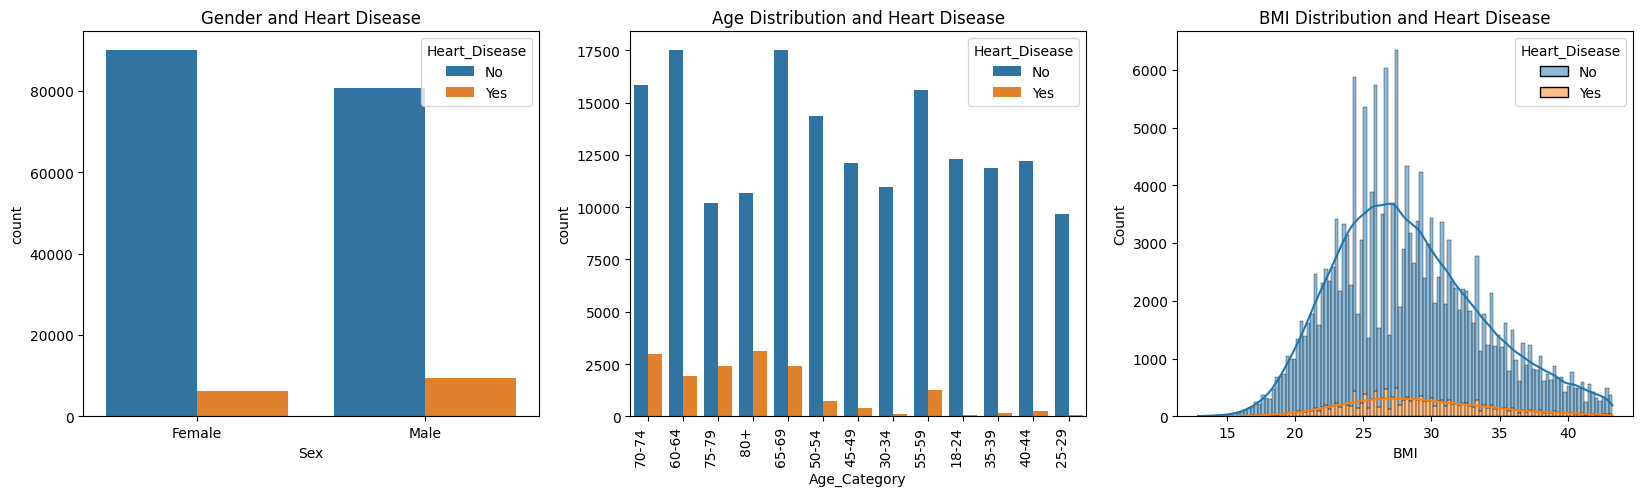

In [86]:
fig, ax = plt.subplots(1,3,figsize=(20, 5))
sns.countplot(x = 'Sex', data = df, hue  = 'Heart_Disease', ax = ax[0]).set_title('Gender and Heart Disease')
sns.countplot(x = 'Age_Category', data = df, ax = ax[1], hue = 'Heart_Disease').set_title('Age Distribution and Heart Disease')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, ha='right')
sns.histplot(x = 'BMI', data = df, ax = ax[2], kde = True, hue = 'Heart_Disease', multiple = 'stack').set_title('BMI Distribution and Heart Disease')

### **Overall Analysis**

The three visualizations collectively show that each of these demographic factors is an important indicator of a patient's risk of cardiovascular disease. The relationships are clear and align with established medical knowledge, which is a strong sign that your data is meaningful for the project.

---

### **1. Gender and Heart Disease**

* **Description:** The first plot is a grouped bar chart that shows the number of male and female patients, segmented by whether they have heart disease (`Yes` or `No`).
* **Analysis:** For both genders, the number of patients without heart disease (`No`, in blue) is significantly higher than those with heart disease (`Yes`, in orange). However, the **proportion of heart disease cases is higher in males than in females**. Visually, the orange bar for males is a larger percentage of the total male population than the orange bar for females is of the total female population. This suggests that **being male is associated with a higher risk of heart disease** in this dataset.

### **2. Age and Heart Disease**

* **Description:** The middle plot is a grouped bar chart showing the count of heart disease cases (`Yes` or `No`) within each age category.
* **Analysis:** This plot reveals a powerful and clear trend: **The number and proportion of heart disease cases increase dramatically with age**.
    * In the younger age groups (e.g., 25-29, 30-34), the orange "Yes" bar is barely visible.
    * As you move to the older age categories, the orange bar becomes progressively taller.
    * For the groups aged 60 and above, the "Yes" bar is a substantial portion of the total count, especially in the 80+ category.
    * This demonstrates that **age is one of the most significant risk factors** for heart disease in your dataset.

### **3. BMI and Heart Disease**

* **Description:** The third plot is a stacked histogram that shows the distribution of BMI, with the bars segmented by heart disease status (`No` in blue and `Yes` in orange).
* **Analysis:** This visualization provides compelling evidence of a direct relationship: **As BMI increases, the likelihood of having heart disease also increases.**
    * In the lower BMI ranges (e.g., below 25), the bars are composed almost entirely of the blue "No" segment.
    * As BMI increases and moves into the overweight and obese ranges (e.g., above 25), the orange "Yes" segment begins to grow and takes up a larger and larger proportion of each bar.
    * This visually confirms that **higher BMI is a very strong indicator of cardiovascular disease risk**.


#### General Health and Heart Disease

Text(0.5, 1.0, 'General Health and Heart Disease')

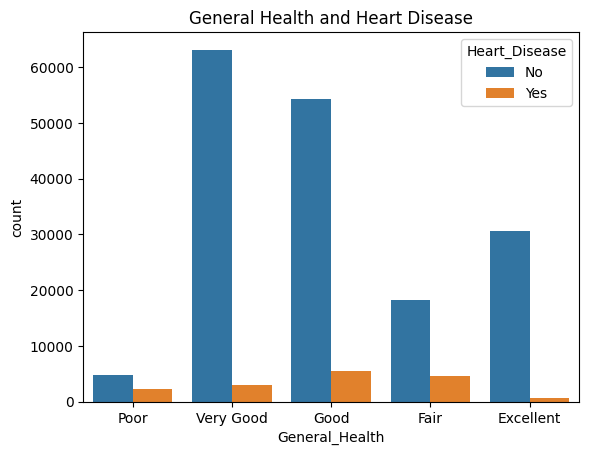

In [93]:
sns.countplot(x='General_Health', data=df, hue='Heart_Disease').set_title('General Health and Heart Disease')

### **Analysis of "General Health and Heart Disease" Plot**

This grouped bar chart is one of the most insightful visualizations you can create for your project. It directly links a patient's own perception of their health to their actual heart disease status. The plot reveals a strong and logical correlation.

#### **Key Observations:**

**1. Inverse Relationship:**
The most striking finding is the strong inverse relationship between self-reported health and the presence of heart disease.
* For the groups with the best health reports (**"Excellent"** and **"Very Good"**), the number of people with heart disease (`Yes`, in orange) is very low. The number of people without heart disease (`No`, in blue) is overwhelmingly dominant.
* As self-reported health deteriorates to **"Good," "Fair,"** and **"Poor,"** the number of people with heart disease (`Yes`) increases significantly.

**2. Proportionality of Risk:**
While the total number of people in the "Excellent" and "Very Good" categories is very high, the **proportion** of people with heart disease in the "Poor" and "Fair" categories is much larger. For instance, the "Yes" bar for the "Poor" health group is a substantial fraction of that entire category, highlighting a much higher risk within that group.

**3. The Most Predictive Health Level:**
The plot suggests that people who report their health as "Good" or "Fair" are at a noticeably higher risk of having heart disease than those who report "Very Good" or "Excellent" health. The "Good" and "Fair" categories show a clear jump in the count of heart disease cases.


#### Checkup and Heart Disease

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Within the past 2 years'),
  Text(1, 0, 'Within the past year'),
  Text(2, 0, '5 or more years ago'),
  Text(3, 0, 'Within the past 5 years'),
  Text(4, 0, 'Never')])

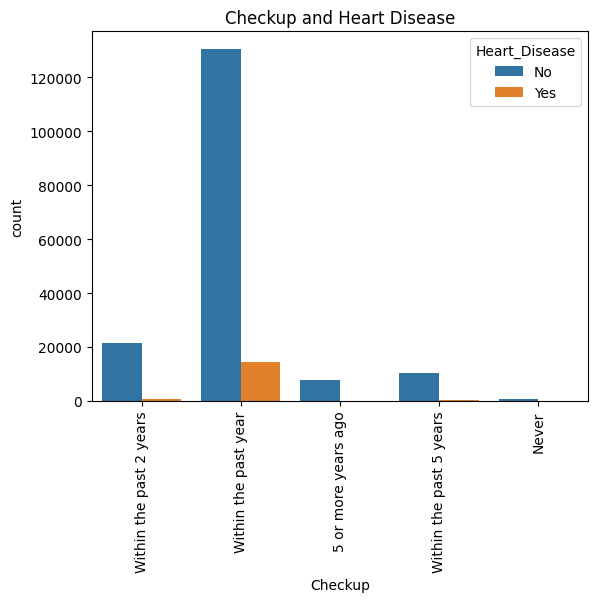

In [97]:
sns.countplot(x = 'Checkup', data = df, hue  = 'Heart_Disease').set_title('Checkup and Heart Disease')
plt.xticks(rotation=90)

### **Analysis of "Checkup and Heart Disease" Plot**

This grouped bar chart is highly insightful as it connects a patient's behavior (seeking medical checkups) with their health outcome. The plot reveals a strong and logical correlation that is a key finding for your project.

#### **Key Observations:**

**1. The "Within the Past Year" Group:**
* This is by far the largest group in the dataset, containing over 125,000 patients.
* The number of people in this group who do not have heart disease (`No`, in blue) is overwhelmingly dominant. The number of people with heart disease (`Yes`, in orange) is very small in comparison.
* This suggests that having a recent checkup is strongly associated with being in good health and not having heart disease.

**2. The "Never" and "5 or More Years Ago" Groups:**
* While the total number of patients in these categories is very small, a key insight can be found by looking at the proportions.
* The proportion of people with heart disease (`Yes`) in these groups appears to be noticeably larger than in the "Within the past year" category.

**3. Inverse Relationship:**
The plot demonstrates a clear inverse relationship: the more recent the medical checkup, the lower the apparent risk of heart disease. A lack of recent medical checkups is correlated with a higher risk of being in the "Heart Disease = Yes" category.

### **Conclusion**

This analysis confirms that the `Checkup` variable is a valuable predictor for your model. It shows a logical link between proactive health management and a lower risk of cardiovascular disease.

#### Excercise and Heart Disease

Text(0.5, 1.0, 'Exercise and Heart Disease')

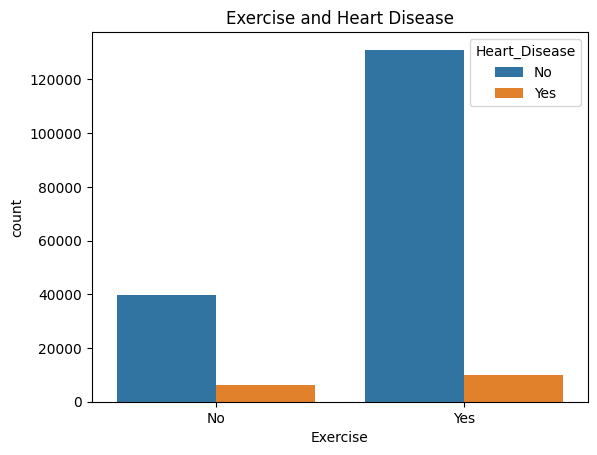

In [101]:
sns.countplot(x = 'Exercise', data = df, hue  = 'Heart_Disease').set_title('Exercise and Heart Disease')

The chart shows the relationship between exercise and the presence of heart disease.

* The group of patients who **do not** exercise (`No` on the x-axis) has a noticeable proportion of individuals with heart disease (`Yes`, in orange).
* In contrast, the group of patients who **do** exercise (`Yes` on the x-axis) has a much smaller proportion of individuals with heart disease.

This indicates that **not exercising is linked to a higher risk of heart disease**, making `Exercise` a valuable feature for predicting the disease.

#### Food Consumption and Heart Disease

Text(0.5, 1.0, 'FriedPotato Consumption and Heart Disease')

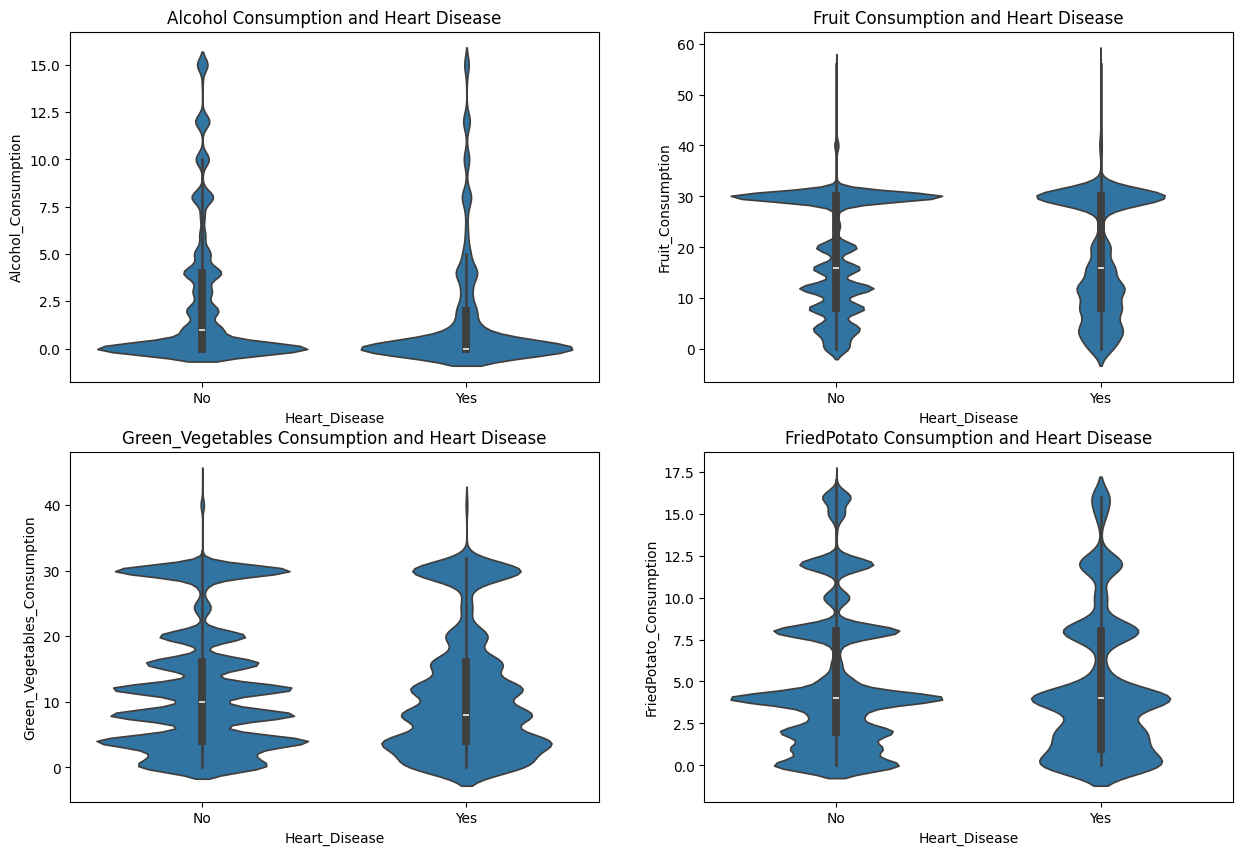

In [105]:
fig, ax = plt.subplots(2,2,figsize=(15, 10))
sns.violinplot(x = 'Heart_Disease', y = 'Alcohol_Consumption', data = df, ax = ax[0,0]).set_title('Alcohol Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Fruit_Consumption', data = df, ax = ax[0,1]).set_title('Fruit Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'Green_Vegetables_Consumption', data = df, ax = ax[1,0]).set_title('Green_Vegetables Consumption and Heart Disease')
sns.violinplot(x = 'Heart_Disease', y = 'FriedPotato_Consumption', data = df, ax = ax[1,1]).set_title('FriedPotato Consumption and Heart Disease')

### **Overall Analysis**

The plots show subtle but important differences in the consumption patterns of patients with and without heart disease. While the overall distributions are similar, there are key shifts that suggest diet plays a role in heart disease risk.

---

### **1. Alcohol Consumption and Heart Disease**

* **Description:** The violin plots show the distribution of alcohol consumption for both groups. Both plots are heavily concentrated at the bottom, indicating that most people have very low alcohol consumption.
* **Analysis:** The violin plot for the `Yes` (Heart Disease) group appears slightly wider at higher consumption levels than the `No` group. This suggests that while most people in both groups consume little alcohol, a **slightly higher proportion of individuals with heart disease have higher alcohol consumption** compared to the healthy group.

### **2. Fruit Consumption and Heart Disease**

* **Description:** The violin plots show the distribution of fruit consumption. The plots have multiple peaks, reflecting the discrete nature of the reported data.
* **Analysis:** The distribution for the `No` (healthy) group appears to be slightly shifted towards higher fruit consumption levels compared to the `Yes` (Heart Disease) group. This suggests that people who consume **more fruit are more likely to be in the group without heart disease**.

### **3. Green Vegetables Consumption and Heart Disease**

* **Description:** The violin plots show the distribution of green vegetable consumption, also with multiple peaks.
* **Analysis:** The pattern here is very similar to the fruit plot. The distribution for the `No` (healthy) group has slightly more density at higher consumption levels. This indicates that people who consume **more green vegetables are more likely to be in the group without heart disease**.

### **4. Fried Potato Consumption and Heart Disease**

* **Description:** The violin plots for fried potato consumption are heavily concentrated at the bottom, similar to alcohol consumption.
* **Analysis:** The violin plot for the `Yes` (Heart Disease) group appears slightly more spread out and has a thicker "waist" at higher consumption values than the `No` group. This suggests that **people with heart disease are, on average, more likely to consume higher amounts of fried potatoes** than their healthy counterparts.

### **Conclusion**

The analysis confirms that the four consumption-related features have a meaningful relationship with heart disease, validating your choice to include them in your project.

* **Favorable Diet:** Higher consumption of fruits and green vegetables appears to be associated with a lower risk of heart disease.
* **Unfavorable Diet:** Higher consumption of alcohol and fried potatoes appears to be associated with a higher risk of heart disease.

#### **Step 1: Separate Features and Target Variable**

First, you need to split your data into `X` (the features or independent variables) and `y` (your target variable). Your target is now the `Heart_Disease_Yes` column.

In [425]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
# Your target is the Heart_Disease_Yes column
X = df_processed.drop(columns=['Heart_Disease_Yes'])
y = df_processed['Heart_Disease_Yes']


#### **Step 2: Split the Data into Training and Testing Sets**

As we discussed before, this step is crucial for evaluating your model's performance on unseen data. Remember to use `random_state` for reproducibility and `stratify` for your imbalanced target variable.

In [428]:
# Split the data, ensuring the class balance is maintained
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # Use a fixed number for reproducibility
    stratify=y # This is crucial for your imbalanced dataset
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")